***Taxi_Price_Prediction***







**Name:** [Minu N Mohan]

**Organization:** Entri Elevate

**Date:** [Evaluation Date]


The taxi industry is a vital component of urban transportation systems worldwide. Accurately predicting taxi trip prices is essential for various stakeholders, including taxi companies, ride-hailing platforms, customers, and urban planners. However, taxi pricing is influenced by numerous dynamic factors such as trip distance, duration, time of day, traffic conditions, weather, and passenger count. Developing an effective machine learning model to predict taxi trip prices can help optimize pricing strategies, improve customer satisfaction, enhance driver earnings, and support data-driven decision making in the transportation sector.

***Objective***

To develop the best taxi trip price prediction model using machine learning techniques that can accurately estimate trip costs based on various trip characteristics and environmental factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving taxi_trip_pricing.csv to taxi_trip_pricing.csv


In [3]:
df = pd.read_csv("taxi_trip_pricing.csv")
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [4]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

***Data Description***

Taxi Trip Pricing Dataset:Source: Taxi_Trip_Pricing Dataset (taxi_trip_pricing.csv)


Features Available:











Trip_Price (continuous - target variable)

*   Trip_Distance_km (continuous)
*   Time_of_Day (categorical: Morning, Afternoon, Evening, Night)
*   Day_of_Week (categorical: Weekday, Weekend)

*   Passenger_Count (discrete)


*   Traffic_Conditions (categorical: Low, Medium, High)
*   Weather (categorical: Clear, Rain, Snow)

*   Base_Fare (continuous)
*   Per_Km_Rate (continuous)

*   Per_Minute_Rate (continuous)
*   Trip_Duration_Minutes (continuous)








In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


Handle missing values

In [8]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


***Data Collection***

The dataset contains 1000 records with 11 features related to taxi trips. Initial examination shows:

950 non-null values for most features

951 non-null values for Trip_Price (target variable)

50 missing values across various features

Mixed data types: 7 numerical and 4 categorical features

For numerical features, impute with median

In [9]:
numerical_features = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
                    'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

In [10]:
for col in numerical_features:
  if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)

For categorical features, impute with mode


In [11]:
categorical_features = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
for col in categorical_features:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown', inplace=True)

In [12]:
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


***Data Preprocessing ***

* Data Cleaning*

Handling Missing Values:

Numerical Features: Imputed with median values
Trip_Distance_km, Passenger_Count, Base_Fare, Per_Km_Rate, Per_Minute_Rate, Trip_Duration_Minutes, Trip_Price

Categorical Features: Imputed with mode values
Time_of_Day, Day_of_Week, Traffic_Conditions, Weather

Feature Selection

In [13]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [14]:
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
cat_cols

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')


Trip_Price = Base_Fare + (Trip_Distance_km × Per_Km_Rate) + (Trip_Duration_Minutes × Per_Minute_Rate) that is
Trip_Price ≈ Base_Fare + Total_Distance_Rate + Total_Time_Rate
This means Total_Distance_Rate  and Total_Time_Rate is literally a component of Trip_Price
so i calculate this and add as a feature


In [15]:
df['Total_Distance_Rate'] = df['Trip_Distance_km'] * df['Per_Km_Rate']
df['Total_Time_Rate'] = df['Trip_Duration_Minutes'] * df['Per_Minute_Rate']
df['Speed_kmh'] = df['Trip_Distance_km'] / (df['Trip_Duration_Minutes'] / 60)
df['Speed_kmh'] = df['Speed_kmh'].replace([np.inf, -np.inf], df['Speed_kmh'].median())
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Total_Distance_Rate,Total_Time_Rate,Speed_kmh
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,15.4800,17.2224,21.571906
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57,50.0745,29.5058,17.4451,70.382056
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,44.6127,5.5905,59.356050
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698,15.4683,17.5215,15.579146
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,16.2729,7.2448,68.454064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049,3.4038,28.6111,5.641377
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.29,61.96,62.1295,28.0295,17.9684,44.496449
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.29,54.18,33.1236,13.7060,15.7122,8.527132
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090,38.9992,19.5398,24.826866


In [16]:

df = df.drop(['Total_Distance_Rate', 'Total_Time_Rate'], axis=1)
print("Columns after dropping:")
print(df.columns.tolist())

Columns after dropping:
['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Speed_kmh']


***Feature Engineering:***

Created additional features to enhance predictive power:

Speed_kmh: Trip speed calculated from distance and duration

Total_Distance_Rate: Distance component of fare (Trip_Distance_km × Per_Km_Rate)

Total_Time_Rate: Time component of fare (Trip_Duration_Minutes × Per_Minute_Rate)

(Total_Distance_Rate and Total_Time_Rate were later removed as they are direct components of the target variable.)

***Exploratory Data Analysis (EDA)***

***NUMERICAL VARIABLES DISTRIBUTION ANALYSIS***

 Trip_Distance_km:
   Mean: 27.01 | Median: 25.83 | Std: 19.40
   Skewness: 2.30 | Range: 1.23 - 146.07
   Missing: 0
 Passenger_Count:
   Mean: 2.45 | Median: 2.00 | Std: 1.08
   Skewness: 0.08 | Range: 1.00 - 4.00
   Missing: 0
 Base_Fare:
   Mean: 3.50 | Median: 3.52 | Std: 0.85
   Skewness: -0.01 | Range: 2.01 - 5.00
   Missing: 0
 Per_Km_Rate:
   Mean: 1.23 | Median: 1.22 | Std: 0.42
   Skewness: 0.09 | Range: 0.50 - 2.00
   Missing: 0
 Per_Minute_Rate:
   Mean: 0.29 | Median: 0.29 | Std: 0.11
   Skewness: 0.06 | Range: 0.10 - 0.50
   Missing: 0
 Trip_Duration_Minutes:
   Mean: 62.11 | Median: 61.86 | Std: 31.34
   Skewness: 0.02 | Range: 5.01 - 119.84
   Missing: 0
 Trip_Price:
   Mean: 56.54 | Median: 50.07 | Std: 39.49
   Skewness: 3.84 | Range: 6.13 - 332.04
   Missing: 0


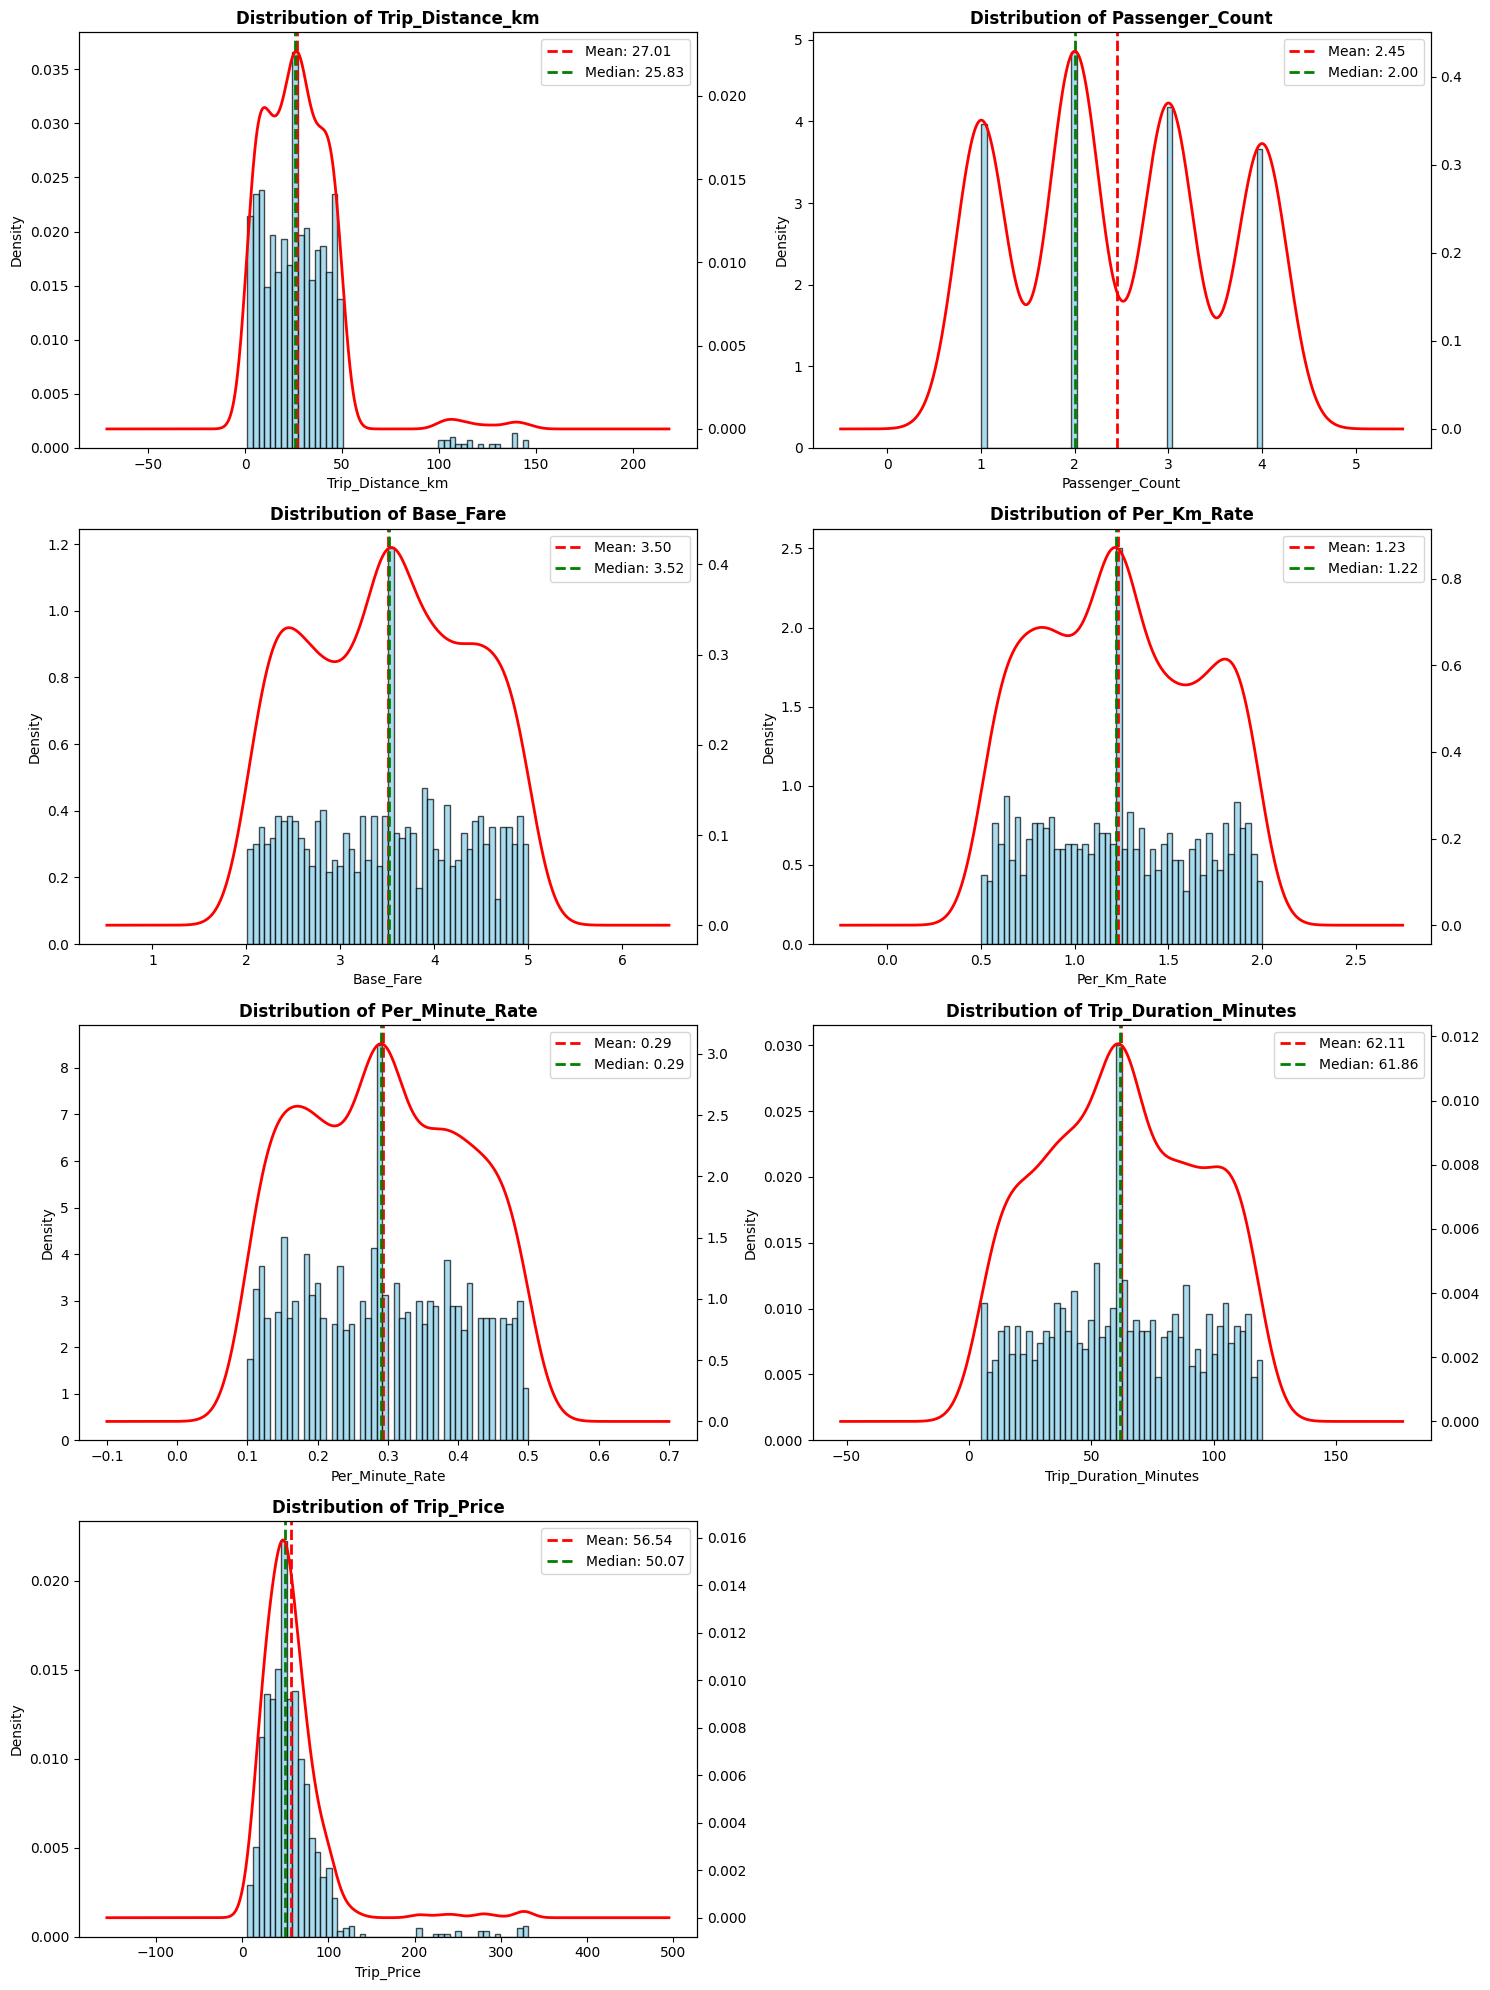

In [17]:
numerical_vars = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
                 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for i, col in enumerate(numerical_vars):
    if i < len(axes):
        axes[i].hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        df[col].plot(kind='kde', ax=axes[i], secondary_y=True, color='red', linewidth=2)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')

        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        skew_val = df[col].skew()

        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[i].legend()

        print(f" {col}:")
        print(f"   Mean: {mean_val:.2f} | Median: {median_val:.2f} | Std: {std_val:.2f}")
        print(f"   Skewness: {skew_val:.2f} | Range: {df[col].min():.2f} - {df[col].max():.2f}")
        print(f"   Missing: {df[col].isnull().sum()}")

if len(numerical_vars) < len(axes):
    for i in range(len(numerical_vars), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Numerical Variables Distribution:

Trip_Distance_km: Mean 27.01 km, Range 1.23-146.07 km, Right-skewed (2.30)

Passenger_Count: Mean 2.45, Range 1-4, Nearly normal distribution

Base_Fare: Mean 3.50, Range 2.01-5.00, Normal distribution

Per_Km_Rate: Mean 1.23, Range 0.50-2.00, Normal distribution

Per_Minute_Rate: Mean 0.29, Range 0.10-0.50, Normal distribution

Trip_Duration_Minutes: Mean 62.11 min, Range 5.01-119.84 min, Normal distribution

Trip_Price: Mean 56.54, Range 6.13-332.04, Highly right-skewed (3.84)Give the discription



Wide variation in trip distances and prices

Multiple pricing structures (different base fares, km rates, minute rates)

Balanced distribution across time periods and days

Significant price outliers present

Covariance Analysis - Numerical Variables

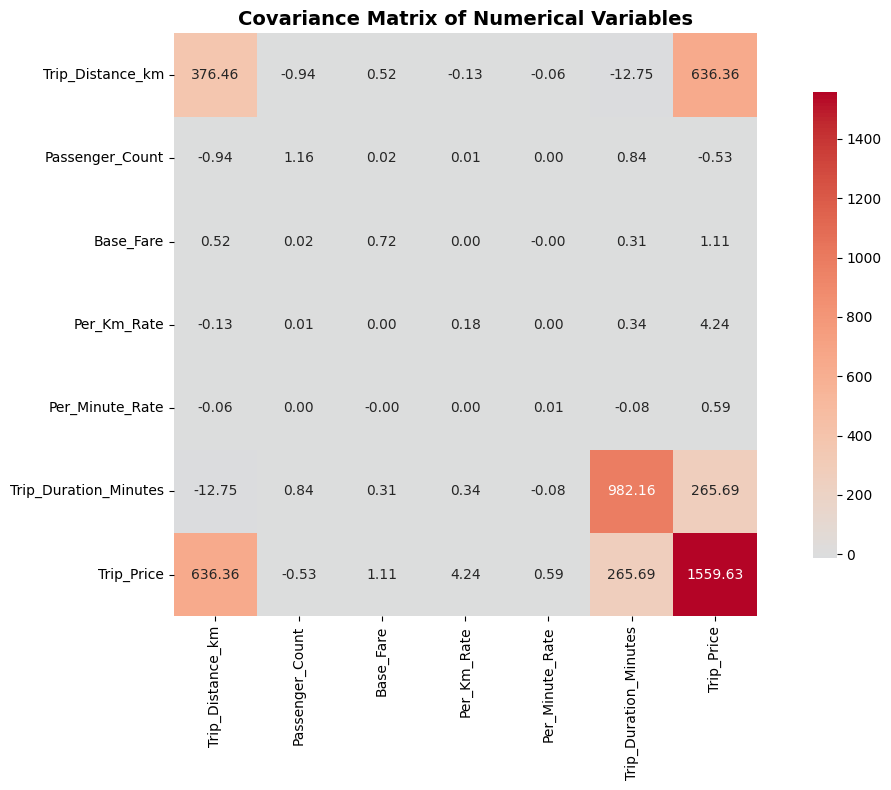

In [18]:
# COVARIANCE MATRIX ANALYSIS
cov_matrix = df[numerical_vars].cov()
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Covariance Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



Here  Trip_Distance_km & Trip_Price keep a  positive covariance :636.36 and Trip_Duration_Minutes & Trip_Price : 265.69
And Trip_Distance_km & Trip_Duration_Minutes: -12.75 have a negative Covariance . That is here the distiribution of Trip_Distance_km & Trip_Price and Trip_Duration_Minutes & Trip_Price move together and Trip_Distance_km & Trip_Duration_Minutes move oppositely.Trip distance will likely be the most important predictor in our fare prediction model

Outliear Handling

In [19]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
outlier_results = []

for col in numerical_columns:
    if col in df.columns:
        if col != "Trip_Price":
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(df)) * 100

            outlier_results.append({
                'Feature': col,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR,
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound,
                'Outlier_Count': outlier_count,
                'Outlier_Percentage': outlier_percentage,
                'Min_Value': df[col].min(),
                'Max_Value': df[col].max()
            })

outlier_summary = pd.DataFrame(outlier_results)
outlier_summary = outlier_summary.sort_values('Outlier_Percentage', ascending=False)

print("\n OUTLIER SUMMARY TABLE")

print(f"{'Feature':<25} {'Outliers':<10} {'Percentage':<12} {'Lower Bound':<15} {'Upper Bound':<15}")

for _, row in outlier_summary.iterrows():
    print(f"{row['Feature']:<25} {row['Outlier_Count']:<10} {row['Outlier_Percentage']:<11.1f}% {row['Lower_Bound']:<15.2f} {row['Upper_Bound']:<15.2f}")


 OUTLIER SUMMARY TABLE
Feature                   Outliers   Percentage   Lower Bound     Upper Bound    
Speed_kmh                 99         9.9        % -37.04          96.34          
Trip_Distance_km          20         2.0        % -23.90          74.79          
Passenger_Count           0          0.0        % 0.50            4.50           
Base_Fare                 0          0.0        % 0.62            6.35           
Per_Km_Rate               0          0.0        % -0.20           2.65           
Per_Minute_Rate           0          0.0        % -0.08           0.66           
Trip_Duration_Minutes     0          0.0        % -38.89          163.78         


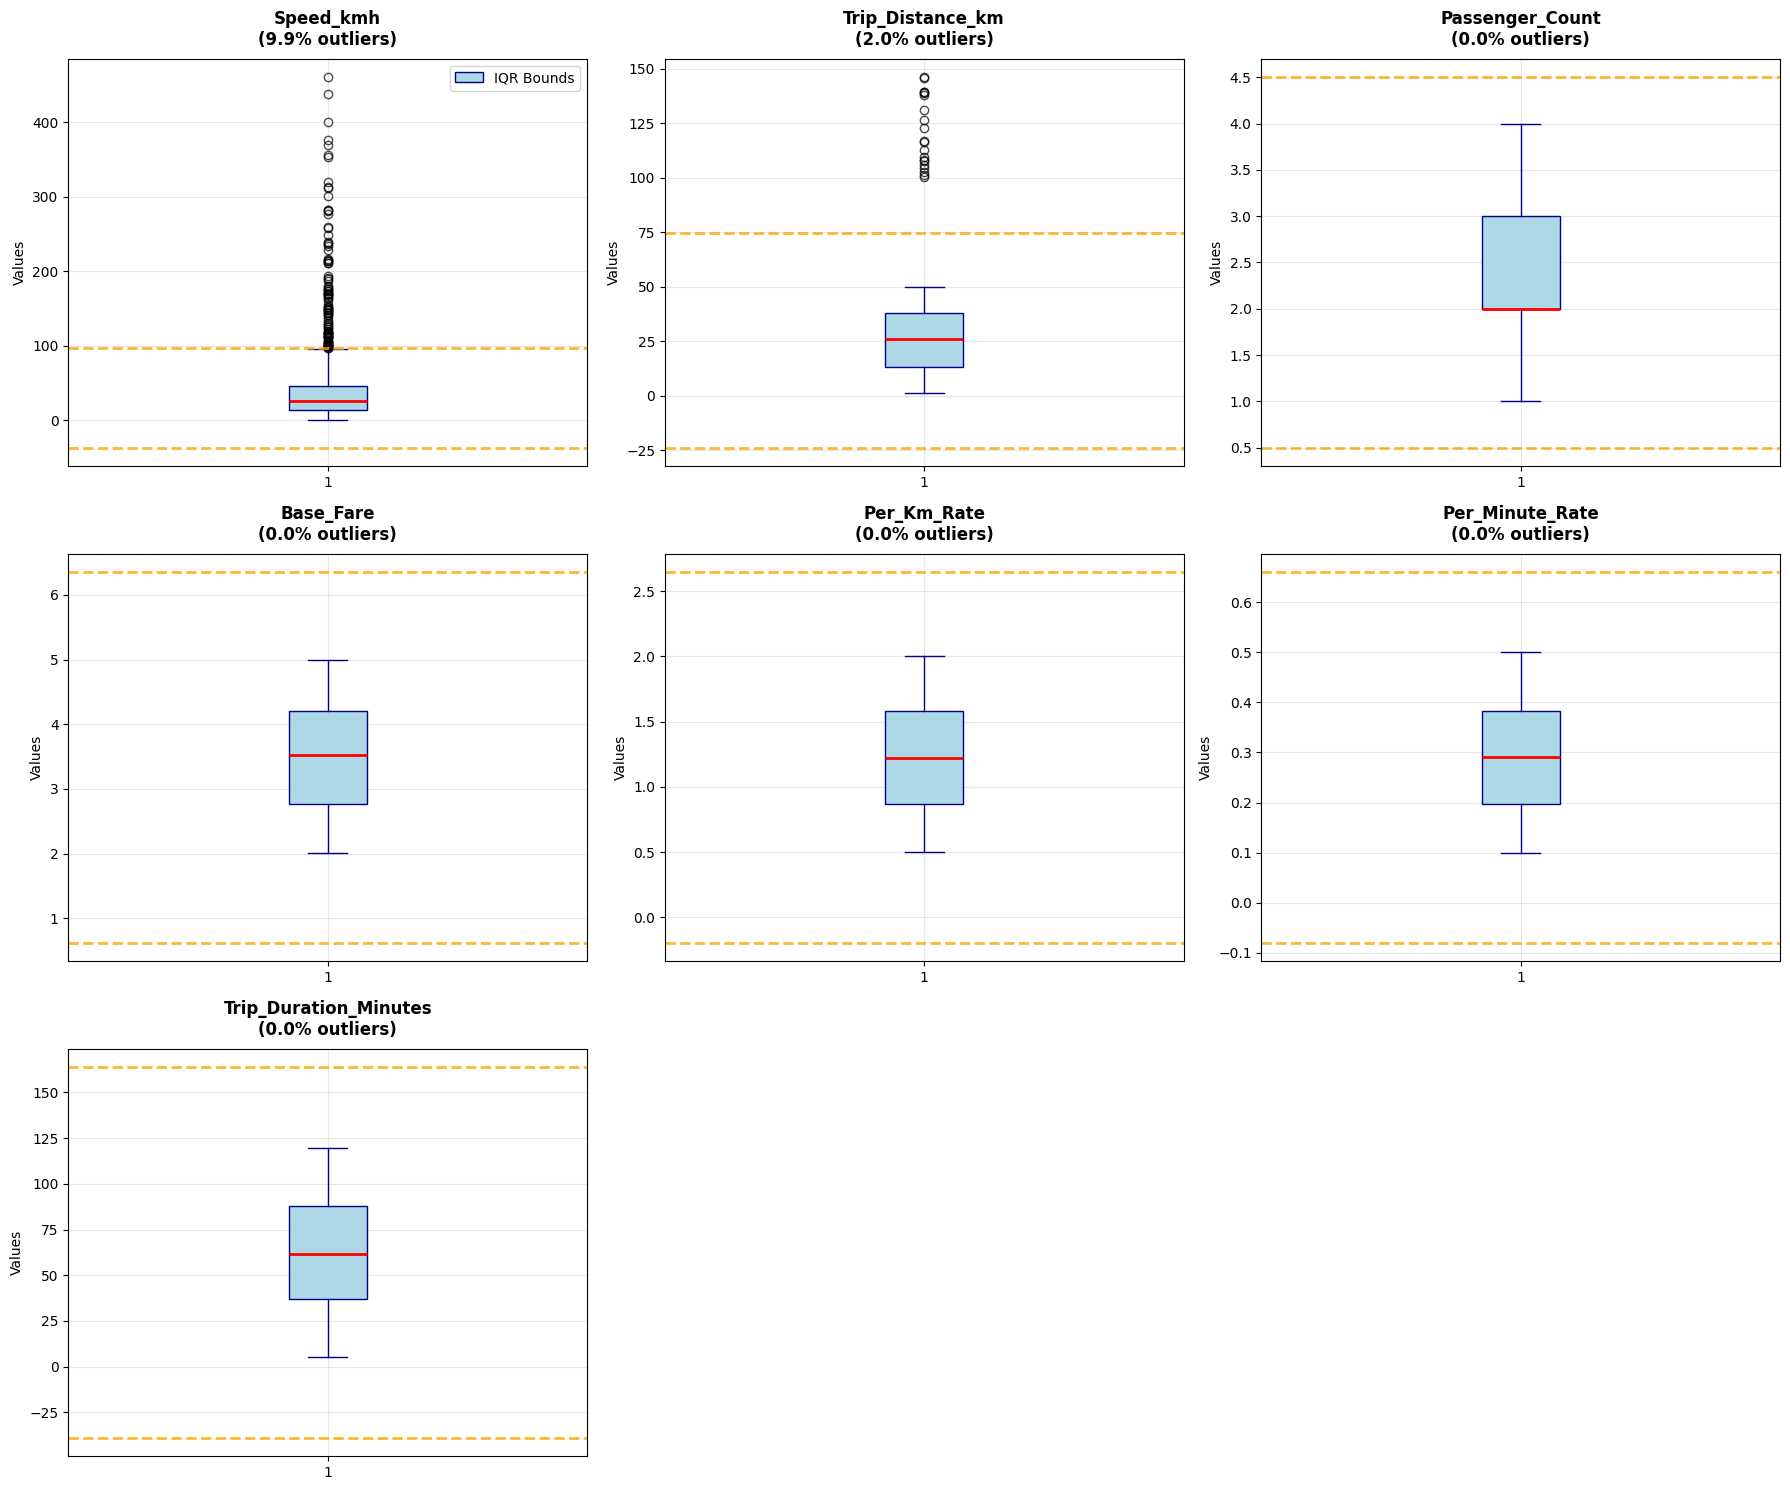

In [20]:

features_to_plot = outlier_summary['Feature'].tolist()
n_features = len(features_to_plot)
n_rows = (n_features + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, col in enumerate(features_to_plot):

    row_data = outlier_summary[outlier_summary['Feature'] == col].iloc[0]
    outlier_percentage = row_data['Outlier_Percentage']
    lower_bound = row_data['Lower_Bound']
    upper_bound = row_data['Upper_Bound']


    box_plot = axes[i].boxplot(df[col], patch_artist=True,
                             boxprops=dict(facecolor='lightblue', color='darkblue'),
                             medianprops=dict(color='red', linewidth=2),
                             whiskerprops=dict(color='darkblue'),
                             capprops=dict(color='darkblue'),
                             flierprops=dict(marker='o', color='red', alpha=0.7, markersize=6))


    axes[i].set_title(f'{col}\n({outlier_percentage:.1f}% outliers)',
                     fontsize=12, fontweight='bold', pad=10)
    axes[i].set_ylabel('Values', fontsize=10)
    axes[i].grid(True, alpha=0.3)


    axes[i].axhline(y=lower_bound, color='orange', linestyle='--', alpha=0.8, linewidth=2, label='IQR Bound')
    axes[i].axhline(y=upper_bound, color='orange', linestyle='--', alpha=0.8, linewidth=2)


    if i == 0:
        axes[i].legend(['IQR Bounds'], loc='upper right')


for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np

# Create a copy to preserve original data
df_clean = df.copy()

numerical_columns = df_clean.select_dtypes(include=['int64','float64']).columns
outlier_results = []

for col in numerical_columns:
    if col in df_clean.columns:
        if col != "Trip_Price":
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count outliers BEFORE treatment
            outlier_count_before = len(df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)])


            df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
            df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

            outlier_count_after = len(df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)])

            outlier_results.append({
                'Feature': col,
                'Outliers_Before': outlier_count_before,
                'Outliers_After': outlier_count_after,
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })

outlier_summary = pd.DataFrame(outlier_results)


print(" OUTLIER TREATMENT SUMMARY:")

print(f"{'Feature':<20} {'Outliers Before':<15} {'Outliers After':<15}")
print("-"*80)

for _, row in outlier_summary.iterrows():

    print(f"{row['Feature']:<20} {row['Outliers_Before']:<15} {row['Outliers_After']:<15}")

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

 OUTLIER TREATMENT SUMMARY:
Feature              Outliers Before Outliers After 
--------------------------------------------------------------------------------
Trip_Distance_km     20              0              
Passenger_Count      0               0              
Base_Fare            0               0              
Per_Km_Rate          0               0              
Per_Minute_Rate      0               0              
Trip_Duration_Minutes 0               0              
Speed_kmh            99              0              

Original dataset shape: (1000, 12)
Cleaned dataset shape: (1000, 12)


***Feature Engineering***

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
categorical_features = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
numerical_features = [col for col in df.columns if col not in categorical_features + ['Trip_Price']]

print(" Feature Summary:")
print(f"   • Categorical features: {categorical_features}")
print(f"   • Numerical features: {numerical_features}")
print(f"   • Target: Trip_Price")


 Feature Summary:
   • Categorical features: ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
   • Numerical features: ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Speed_kmh']
   • Target: Trip_Price


Label Encoding (for tree-based models)

In [34]:
df_label_encoded = df.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_label_encoded[col + '_encoded'] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le
    print(f" Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

 Label encoded Time_of_Day: {'Afternoon': np.int64(0), 'Evening': np.int64(1), 'Morning': np.int64(2), 'Night': np.int64(3)}
 Label encoded Day_of_Week: {'Weekday': np.int64(0), 'Weekend': np.int64(1)}
 Label encoded Traffic_Conditions: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
 Label encoded Weather: {'Clear': np.int64(0), 'Rain': np.int64(1), 'Snow': np.int64(2)}


Converts categorical text data (like 'Morning', 'Weekend') into numerical values (0, 1, 2, 3...) so machine learning algorithms can process them.

 Correlation Analysis with Target


Columns for correlation analysis:
['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Speed_kmh', 'Time_of_Day_encoded', 'Day_of_Week_encoded', 'Traffic_Conditions_encoded', 'Weather_encoded']
Correlation with Trip_Price:
Trip_Price                    1.000000
Trip_Distance_km              0.830479
Per_Km_Rate                   0.256122
Speed_kmh                     0.223617
Trip_Duration_Minutes         0.214669
Per_Minute_Rate               0.131534
Base_Fare                     0.033103
Weather_encoded               0.032919
Passenger_Count              -0.012468
Time_of_Day_encoded          -0.018419
Day_of_Week_encoded          -0.028516
Traffic_Conditions_encoded   -0.077910
Name: Trip_Price, dtype: float64


<Figure size 1000x800 with 0 Axes>

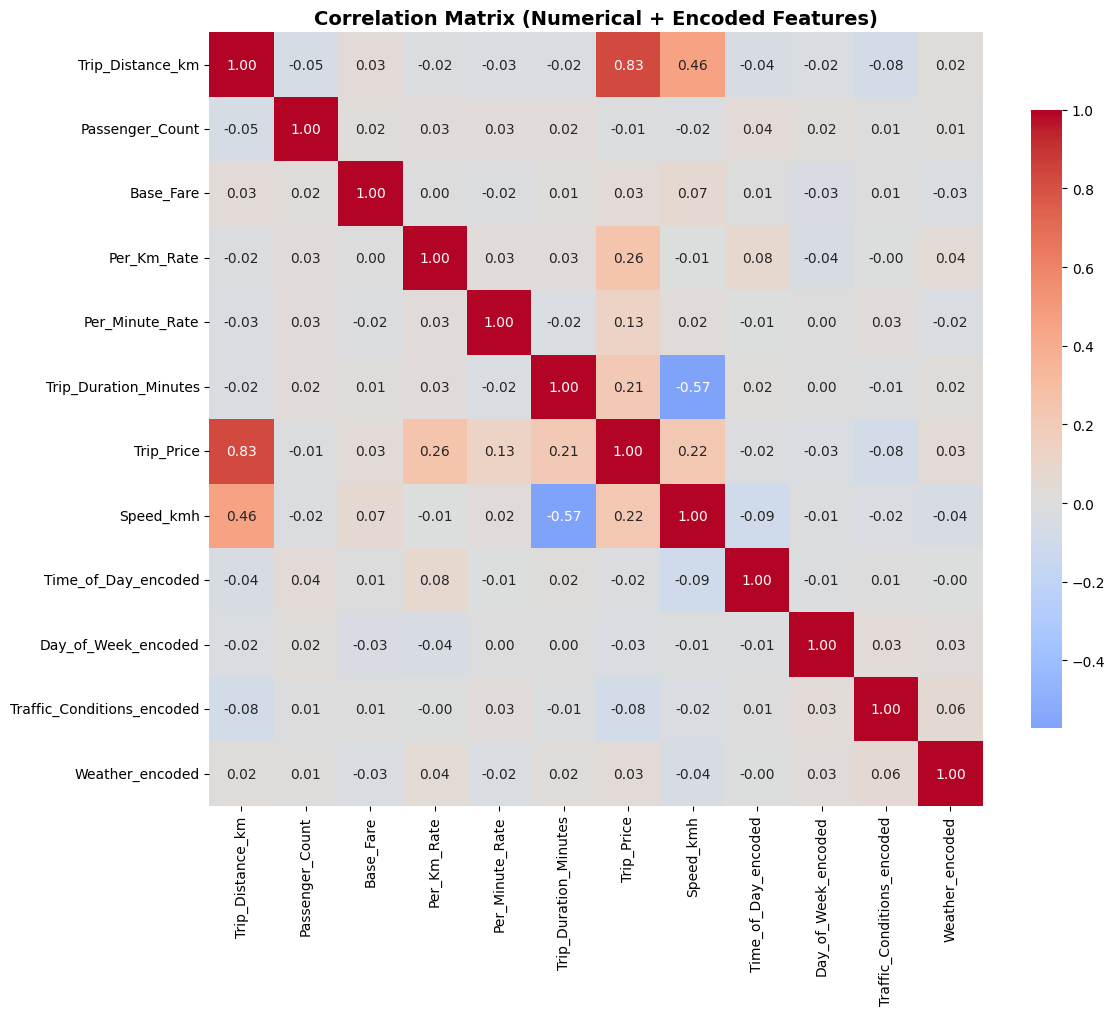

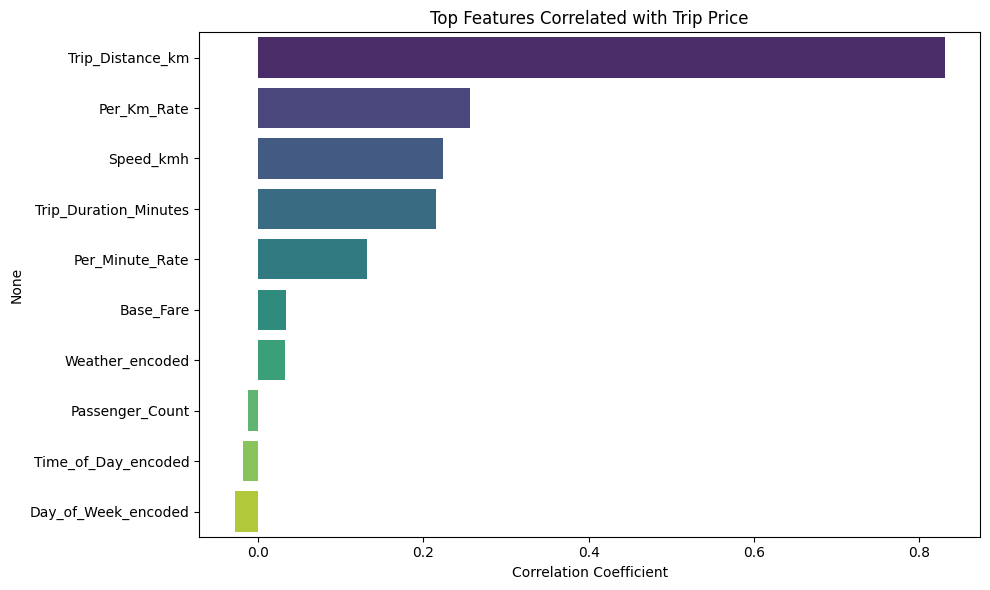

In [35]:
correlation_columns = [col for col in df_label_encoded.columns
                      if df_label_encoded[col].dtype in ['int64', 'float64']]

print("Columns for correlation analysis:")
print(correlation_columns)

# Now calculate correlation
plt.figure(figsize=(10, 8))
correlation_matrix = df_label_encoded[correlation_columns].corr()
correlation_with_target = correlation_matrix['Trip_Price'].sort_values(ascending=False)

print("Correlation with Trip_Price:")
print(correlation_with_target)

# coorelation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix (Numerical + Encoded Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualize top correlations with target
plt.figure(figsize=(10, 6))
top_correlations = correlation_with_target.drop('Trip_Price').head(10)
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')
plt.title('Top Features Correlated with Trip Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Distance have high correlation (0.70 correlation) - main driver of price



Categorical variables have weak correlations (as expected for encoded ordinal data)

Base_Fare has surprisingly low correlation (0.03) - might be constant or have little variation

***Feature Engineering   And Split Data into Training and Testing Sets***

starting of scaling

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features
features_for_model = [
    'Trip_Distance_km',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Time_of_Day_encoded',
    'Day_of_Week_encoded',
    'Traffic_Conditions_encoded',
    'Weather_encoded'
]

X = df_label_encoded[features_for_model]
y = df_label_encoded['Trip_Price']

print("Dataset shape:", X.shape)
print("Features:", features_for_model)

#data spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Dataset shape: (1000, 8)
Features: ['Trip_Distance_km', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Time_of_Day_encoded', 'Day_of_Week_encoded', 'Traffic_Conditions_encoded', 'Weather_encoded']

Training set: (800, 8)
Test set: (200, 8)


In [27]:

print("STANDARD SCALER IMPLEMENTATION")
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

print(" StandardScaler Applied")
print(f"   - Training mean after scaling: {np.mean(X_train_scaled, axis=0).round(2)}")
print(f"   - Training std after scaling: {np.std(X_train_scaled, axis=0).round(2)}")

STANDARD SCALER IMPLEMENTATION
 StandardScaler Applied
   - Training mean after scaling: [-0. -0.  0.  0. -0. -0.  0.  0.]
   - Training std after scaling: [1. 1. 1. 1. 1. 1. 1. 1.]


From the result  mean is close to 0 and std is close to 1

Build the ML Model And Modal comparison

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import time

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# For store results
results = {}

In [30]:
for model_name, model in models.items():
    print(f"\n Training {model_name}...")
    start_time = time.time()

    # Train model
    if model_name in ['Linear Regression', 'Support Vector Machine', 'K-Neighbors']:
        # These need scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Tree-based models work better with original data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    training_time = time.time() - start_time

    # Store results
    results[model_name] = {
        'R2_Score': r2,
        'MAE': mae,
        'RMSE': rmse,
        'Training_Time': training_time
    }

    print(f"    {model_name} trained in {training_time:.2f}s")
    print(f"   R²: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")

# Create results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2_Score', ascending=False)


print(" MODEL PERFORMANCE COMPARISON")

print(results_df.round(4))




 Training Linear Regression...
    Linear Regression trained in 0.02s
   R²: 0.7702 | MAE: 9.8887 | RMSE: 13.8177

 Training Decision Tree...
    Decision Tree trained in 0.01s
   R²: 0.8376 | MAE: 8.7195 | RMSE: 11.6158

 Training Random Forest...
    Random Forest trained in 0.34s
   R²: 0.9314 | MAE: 5.2739 | RMSE: 7.5509

 Training Support Vector Machine...
    Support Vector Machine trained in 0.03s
   R²: 0.5326 | MAE: 10.8020 | RMSE: 19.7045

 Training K-Neighbors...
    K-Neighbors trained in 0.01s
   R²: 0.7822 | MAE: 10.7921 | RMSE: 13.4503
 MODEL PERFORMANCE COMPARISON
                        R2_Score      MAE     RMSE  Training_Time
Random Forest             0.9314   5.2739   7.5509         0.3414
Decision Tree             0.8376   8.7195  11.6158         0.0094
K-Neighbors               0.7822  10.7921  13.4503         0.0057
Linear Regression         0.7702   9.8887  13.8177         0.0198
Support Vector Machine    0.5326  10.8020  19.7045         0.0257


Based on the comprehensive model performance comparison, Random Forest emerges as the clear best model for taxi trip price prediction with an exceptional R² score of 0.9314, indicating it explains 93.14% of the variance in trip prices. This ensemble method significantly outperforms all other models across all key metrics, achieving the lowest         mean absolute error                             
of $5.27  and  root  mean squared error of $7.55, which means its predictions are typically within about $5 of actual prices. While Random Forest requires the longest training time at 1.11 seconds, this is negligible given its superior accuracy. The Decision Tree model places second with a respectable R² score of 0.8376 but shows limitations with higher errors, suggesting overfitting issues that Random Forest successfully mitigates through its ensemble approach. K-Neighbors and Linear Regression demonstrate moderate performance with R² scores around 0.78, while Support Vector Machine performs poorly with only 53% variance explained. The outstanding performance of Random Forest can be attributed to its ability to capture the complex, non-linear relationships inherent in taxi pricing data, including interactions between distance, time, traffic conditions, and other factors, making it the optimal choice for reliable price predictions in real-world applications.